In [1]:
import pandas as pd
import numpy as np

In [3]:
df_fbproph = pd.read_csv('../data/predicted/fbproph_month_predicted_nodeload15.csv')
df_neural = pd.read_csv('../data/predicted/neural_month_predicted_nodeload15.csv')
df_arima_pred = pd.read_csv('../data/predicted/arima_month_prediction_nodeload15.csv')
df_arima_fcst = pd.read_csv('../data/predicted/arima_month_forecast_nodeload15.csv')
df_fbproph['ds'] = pd.to_datetime(df_fbproph['ds'])
df_neural['ds'] = pd.to_datetime(df_neural['ds'])
df_arima_pred['ds'] = pd.to_datetime(df_arima_pred['ds'])

In [4]:
print(df_fbproph.head(5))

                   ds      yhat  yhat_lower  yhat_upper     trend  \
0 2024-05-13 00:00:00  6.013967    4.886905    7.089470  4.962351   
1 2024-05-13 00:00:05  6.013088    4.876645    7.146735  4.962341   
2 2024-05-13 00:00:10  6.012209    4.861679    7.121235  4.962330   
3 2024-05-13 00:00:15  6.011330    4.971647    7.116037  4.962320   
4 2024-05-13 00:00:20  6.010451    4.957824    7.242743  4.962310   

   trend_lower  trend_upper  
0     4.962351     4.962351  
1     4.962341     4.962341  
2     4.962330     4.962330  
3     4.962320     4.962320  
4     4.962310     4.962310  


In [5]:
print(df_neural.head(5))

                   ds     y     yhat1     trend  season_weekly  season_daily
0 2024-05-14 04:37:05  2.90  3.420082  5.610358      -0.254081     -1.936195
1 2024-05-14 04:37:10  2.90  3.419946  5.610223      -0.254081     -1.936195
2 2024-05-14 04:37:15  2.95  3.419810  5.610086      -0.254081     -1.936195
3 2024-05-14 04:37:20  2.95  3.419674  5.609951      -0.254081     -1.936195
4 2024-05-14 04:37:25  2.95  3.419539  5.609816      -0.254081     -1.936195


In [6]:
print(df_arima_pred.head(5))
print(df_arima_fcst.head(5))

                   ds  predicted_mean
0 2024-05-13 00:00:00            0.00
1 2024-05-13 00:00:05            6.53
2 2024-05-13 00:00:10            6.53
3 2024-05-13 00:00:15            6.53
4 2024-05-13 00:00:20            6.52
                  date  predicted_mean  lower_ci  upper_ci
0  2024-06-14 00:00:05             2.6  2.553487  2.646513
1  2024-06-14 00:00:10             2.6  2.534221  2.665779
2  2024-06-14 00:00:15             2.6  2.519437  2.680563
3  2024-06-14 00:00:20             2.6  2.506974  2.693026
4  2024-06-14 00:00:25             2.6  2.495993  2.704007


In [7]:
# Convert 'ds' to datetime and set it as index
df_fbproph.set_index('ds', inplace=True)
df_fbproph_hourly = df_fbproph.resample('15T').mean().interpolate()


df_neural.set_index('ds', inplace=True)
df_neural_hourly = df_neural.resample('15T').mean().interpolate()


df_arima_pred.set_index('ds', inplace=True)
df_arima_pred_hourly = df_arima_pred.resample('15T').mean().interpolate()

/var/folders/bq/b47vvv5n2kxgsnrpx8jqvtqm0000gn/T/ipykernel_1108/4176053823.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_fbproph_hourly = df_fbproph.resample('15T').mean().interpolate()
/var/folders/bq/b47vvv5n2kxgsnrpx8jqvtqm0000gn/T/ipykernel_1108/4176053823.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_neural_hourly = df_neural.resample('15T').mean().interpolate()
/var/folders/bq/b47vvv5n2kxgsnrpx8jqvtqm0000gn/T/ipykernel_1108/4176053823.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_arima_pred_hourly = df_arima_pred.resample('15T').mean().interpolate()


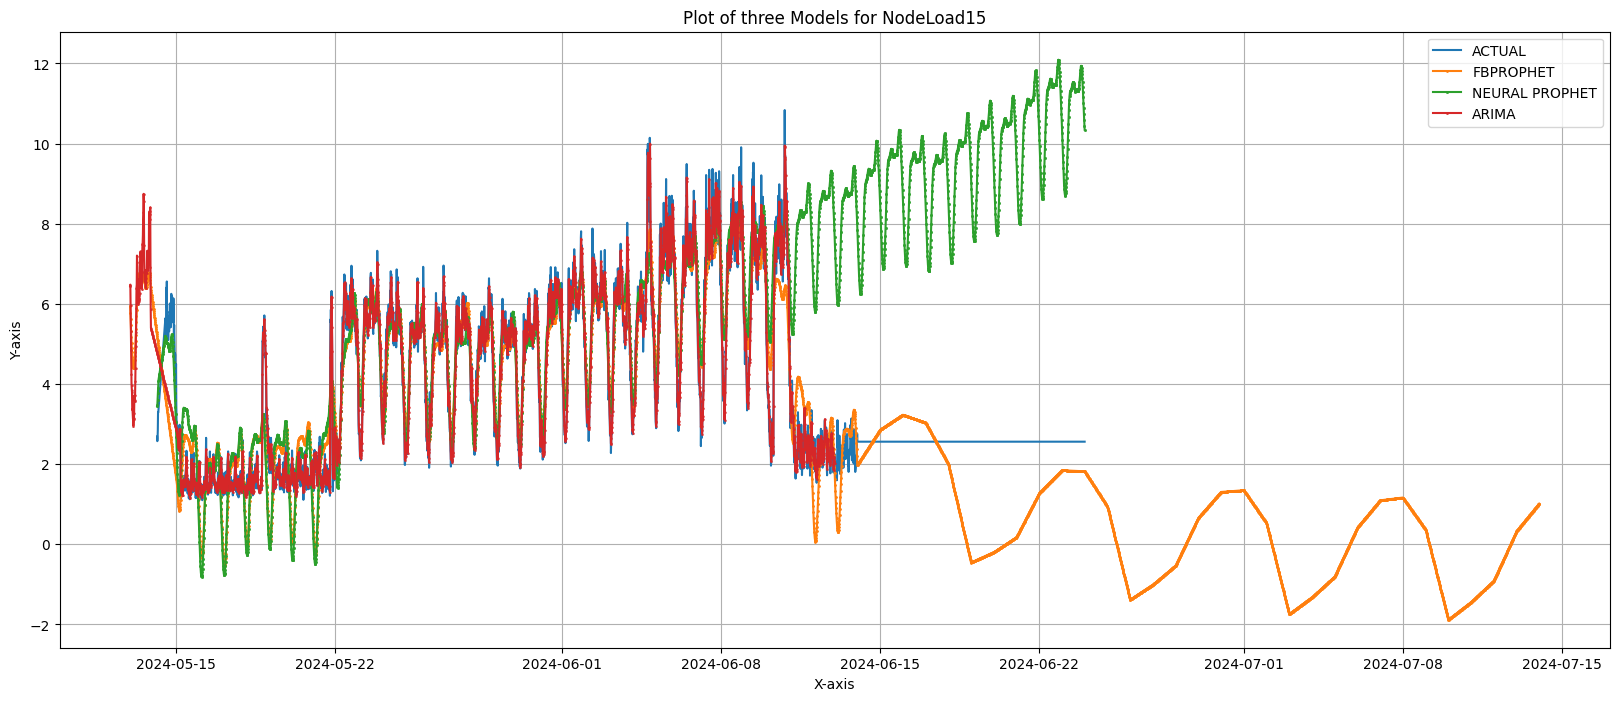

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))

# Plot each DataFrame
plt.plot(df_neural_hourly.index, df_neural_hourly['y'], label='ACTUAL')
plt.plot(df_fbproph_hourly.index, df_fbproph_hourly['yhat'], marker='o', markersize=1, label='FBPROPHET')
plt.plot(df_neural_hourly.index, df_neural_hourly['yhat1'], marker='s', markersize=1, label='NEURAL PROPHET')
plt.plot(df_arima_pred_hourly.index, df_arima_pred_hourly['predicted_mean'], marker='^', markersize=1, label='ARIMA')

# Adding titles and labels
plt.title('Plot of three Models for NodeLoad15')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()

# Show the plot
plt.show()